In [1]:
import cv2
import numpy as np

def count_leaves(image_path):
    # Step 1: Load the image
    img = cv2.imread(image_path)
    original_image = img.copy()

    # Step 2: Convert to HSV color space
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Step 3: Define lower and upper bounds for green
    lower_green = np.array([40, 40, 40])  # Adjust these values as needed
    upper_green = np.array([90, 255, 255])

    # Threshold the HSV image to get only green colors
    mask = cv2.inRange(hsv, lower_green, upper_green)

    # Step 4: Apply morphological operations to clean up the mask
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    # Step 5: Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Step 6: Initialize leaf count
    leaf_count = 0

    # Loop through contours and count leaves
    for contour in contours:
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        
        # Filter out small contours and those with a high circularity
        if area > 100:  # Minimum area threshold
            circularity = (4 * np.pi * area) / (perimeter ** 2) if perimeter > 0 else 0
            if circularity < 0.7:  # Adjust this threshold as needed
                leaf_count += 1
                # Optionally draw the contour on the original image
                cv2.drawContours(original_image, [contour], -1, (0, 255, 0), 2)

    # Step 7: Display the results
    cv2.putText(original_image, f'Leaf Count: {leaf_count}', (10, 50), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    cv2.imshow('Original Image', original_image)
    cv2.imshow('Mask', mask)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Step 8: Return the leaf count
    return leaf_count

# Example usage
image_path = 'images/growth/6.jpg'  # Replace with your image path
leaf_count = count_leaves(image_path)
print(f'Number of leaves: {leaf_count}')

Number of leaves: 0


In [25]:
image_paths = ['images/growth/1.jpg', 'images/growth/2.jpg', 'images/growth/3.jpg','images/growth/4.jpg', 'images/growth/5.jpg', 'images/growth/6.jpg', 'images/growth/7.jpg', 'images/growth/8.jpg', 'images/growth/9.jpg']  # Replace with your image paths
features = []

for image_path in image_paths:
    leaf_count = count_leaves(image_path)
    print(f'Number of leaves: {leaf_count}')

Number of leaves: 0
Number of leaves: 0
Number of leaves: 2
Number of leaves: 1
Number of leaves: 9
Number of leaves: 0
Number of leaves: 2
Number of leaves: 4
Number of leaves: 2


Number of leaves: 9


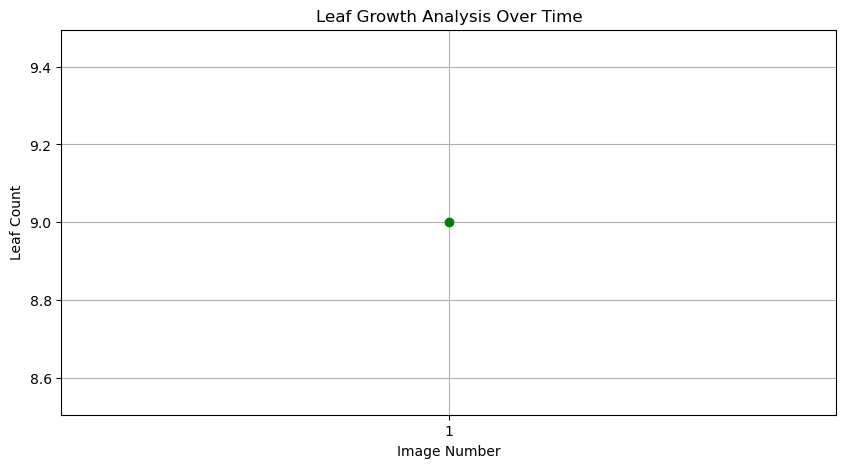

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def count_leaves(image_path):
    # Load the image
    img = cv2.imread(image_path)
    original_image = img.copy()

    # Convert to HSV color space
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Define lower and upper bounds for green (common color of leaves)
    lower_green = np.array([30, 40, 40])  # Adjust these values as needed
    upper_green = np.array([90, 255, 255])

    # Threshold the HSV image to get only green colors
    mask = cv2.inRange(hsv, lower_green, upper_green)

    # Apply morphological operations to clean up the mask
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Initialize leaf count
    leaf_count = 0

    # Loop through contours and count leaves
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 100:  # Filter out small contours (adjust this threshold as needed)
            leaf_count += 1
            # Optionally draw the contour on the original image
            cv2.drawContours(original_image, [contour], -1, (0, 255, 0), 10)

    # Display the results
    cv2.putText(original_image, f'Leaf Count: {leaf_count}', (10, 150), 
                cv2.FONT_HERSHEY_SIMPLEX, 5, (255, 0, 0), 10)

    # Uncomment to view images if needed
    # cv2.imshow('Original Image', original_image)
    # cv2.imshow('Mask', mask)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

    return leaf_count

# Image paths for growth stages
image_paths = ['images/growth/6.jpg']  # Replace with your image paths

# Collect leaf count data
leaf_counts = []

for image_path in image_paths:
    leaf_count = count_leaves(image_path)
    leaf_counts.append(leaf_count)
    print(f'Number of leaves: {leaf_count}')

# Plotting leaf count growth over time
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(leaf_counts) + 1), leaf_counts, marker='o', linestyle='-', color='g')
plt.title('Leaf Growth Analysis Over Time')
plt.xlabel('Image Number')
plt.ylabel('Leaf Count')
plt.xticks(range(1, len(leaf_counts) + 1))
plt.grid()
plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path
from pillow_heif import register_heif_opener

register_heif_opener()

def count_leaves(image_path):
    # Step 1: Load the image
    img = cv2.imread(image_path)
    original_image = img.copy()

    # Step 2: Convert to HSV color space
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Step 3: Define lower and upper bounds for green
    lower_green = np.array([40, 40, 40])  # Adjust these values as needed
    upper_green = np.array([90, 255, 255])

    # Threshold the HSV image to get only green colors
    mask = cv2.inRange(hsv, lower_green, upper_green)

    # Step 4: Apply morphological operations to clean up the mask
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    # Step 5: Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Step 6: Initialize leaf count
    leaf_count = 0

    # Loop through contours and count leaves
    for contour in contours:
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        
        # Filter out small contours and those with a high circularity
        if area > 100:  # Minimum area threshold
            circularity = (4 * np.pi * area) / (perimeter ** 2) if perimeter > 0 else 0
            if circularity < 0.7:  # Adjust this threshold as needed
                leaf_count += 1
                # Optionally draw the contour on the original image
                cv2.drawContours(original_image, [contour], -1, (0, 255, 0), 2)

    # Step 7: Display the results
    cv2.putText(original_image, f'Leaf Count: {leaf_count}', (10, 50), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    cv2.imshow('Original Image', original_image)
    cv2.imshow('Mask', mask)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Step 8: Return the leaf count
    return leaf_count

# Image paths for growth stages
# image_paths = [
#     'images/growth/1.jpg', 'images/growth/2.jpg', 'images/growth/3.jpg',
#     'images/growth/4.jpg', 'images/growth/5.jpg', 'images/growth/6.jpg',
#     'images/growth/7.jpg', 'images/growth/8.jpg', 'images/growth/9.jpg'
# ]  # Replace with your image paths

#Load images
image_paths = []
input_path = Path('images/growth')
for image_file in input_path.rglob('*.jpg'):
        image_paths.append(image_file)

# Collect leaf count data
leaf_counts = []

for image_path in image_paths:
    leaf_count = count_leaves(image_path)
    leaf_counts.append(leaf_count)
    print(f'Number of leaves: {leaf_count}')

# Plotting leaf count growth over time
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(leaf_counts) + 1), leaf_counts, marker='o', linestyle='-', color='g')
plt.title('Leaf Growth Analysis Over Time')
plt.xlabel('Image Number')
plt.ylabel('Leaf Count')
plt.xticks(range(1, len(leaf_counts) + 1))
plt.grid()
plt.show()

Number of leaves: 0
Number of leaves: 0
Number of leaves: 2
Number of leaves: 1
Number of leaves: 9
Number of leaves: 0
